In [1]:
from avalon_env import AvalonGameSetup, AvalonGameEnv, simulate_game
from naive_agents import *
from play_game import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Play 1 game

In [2]:
setup = AvalonGameSetup.from_num_players(7)
env = AvalonGameEnv(setup)
env.reset()
players = []
for i, role in enumerate(env.roles):
    if role == 0:
        players.append(NaiveServant(env, player=i))
    elif role == 1:
        players.append(NaiveMerlin(env, player=i))
    elif role == 2:
        players.append(NaiveMinion(env, player=i))
    elif role == 3:
        players.append(NaiveAssassin(env, player=i))
players

[NaiveMerlin(player #0, role=(1, 'Merlin', True),
 NaiveServant(player #1, role=(0, 'Servant', True),
 NaiveServant(player #2, role=(0, 'Servant', True),
 NaiveMinion(player #3, role=(2, 'Minion', False),
 NaiveAssassin(player #4, role=(3, 'Assassin', False),
 NaiveServant(player #5, role=(0, 'Servant', True),
 NaiveMinion(player #6, role=(2, 'Minion', False)]

In [3]:
stat = play_game(env, players, verbose=True)
stat

== GAME BEGINS ==
ROUND #1. Phase: (0, Team Building):
Leader: player #1. Chosen Team: (1, 6))
The next Leader: player #2
Decision Maker: NaiveServant(player #1, role=(0, 'Servant', True)

ROUND #1. Phase: (1, Team Voting):
Success. (4 out of 7) voted for the Team.
The next Phase: (2, 'Quest Voting')
Decision Makers:
Player: NaiveMerlin(player #0, role=(1, 'Merlin', True). Decision: 0 
Player: NaiveServant(player #1, role=(0, 'Servant', True). Decision: 1 
Player: NaiveServant(player #2, role=(0, 'Servant', True). Decision: 0 
Player: NaiveMinion(player #3, role=(2, 'Minion', False). Decision: 1 
Player: NaiveAssassin(player #4, role=(3, 'Assassin', False). Decision: 1 
Player: NaiveServant(player #5, role=(0, 'Servant', True). Decision: 0 
Player: NaiveMinion(player #6, role=(2, 'Minion', False). Decision: 1 

ROUND #1. Phase: (2, Quest Voting)
Quest Team: (1, 6)
Quest failed. 1 player(s) voted to Fail. 
Total number of failed Quests: 1.
The next Round: 2. The next Phase: (0, 'Team Bu

{'num_players': 7, 'round': 2, 'phase': 2, 'good_victory': False}

In [4]:
stat

{'num_players': 7, 'round': 2, 'phase': 2, 'good_victory': False}

### Play 1000 Games

In [5]:
results = {}
n_games = 1000
for n in range(5, 11):
    _, stat_total = play_naive_games(n_games, n)
    good_win_percent = stat_total['good_victory'] / n_games
    results[f'{n} players'] = good_win_percent

100%|██████████| 1000/1000 [04:38<00:00,  3.59it/s]


Text(0, 0.5, 'Good Win Rate')

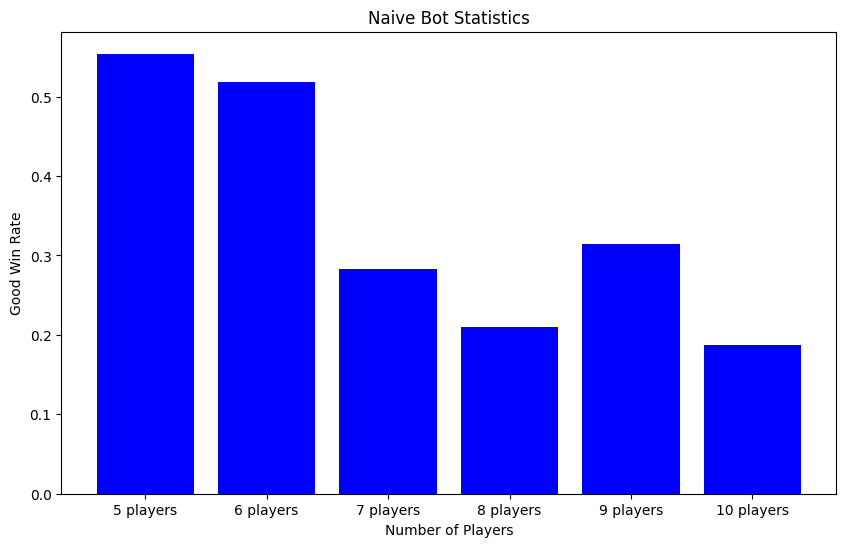

In [6]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(list(results.keys()), list(results.values()), color='blue')

# Adding title and labels
plt.title('Naive Bot Statistics')
plt.xlabel('Number of Players')
plt.ylabel('Good Win Rate')


In [7]:
results

{'5 players': 0.554,
 '6 players': 0.519,
 '7 players': 0.283,
 '8 players': 0.21,
 '9 players': 0.314,
 '10 players': 0.187}